# Sprint17
## 公開されている実装を動かす

## 【問題1】学習と推定 

https://github.com/ryuu09-hub/diveintocode-ml2/blob/master/Sprint/Sprint17_FasterRCNN.ipynb

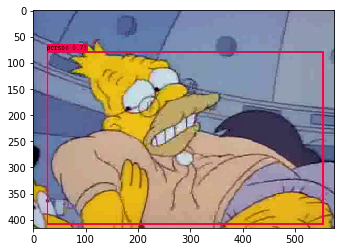

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#推定結果
img=Image.open('result_abraham_grampa_simpson_pic_0000.jpg')
plt.imshow(img)

## 【問題2】論文と実装の対応

コードリーディングを行ってください。
まず、Faster R-CNN[1]において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。

**RPNを実現しているコードはどこか**

In [ ]:
def rpn(base_layers,num_anchors):

x = Convolution2D(512, (3, 3), padding='same', activation='relu', kernel_initializer='normal', name='rpn_conv1')(base_layers)

x_class = Convolution2D(num_anchors, (1, 1), activation='sigmoid', kernel_initializer='uniform', name='rpn_out_class')(x)
x_regr = Convolution2D(num_anchors * 4, (1, 1), activation='linear', kernel_initializer='zero', name='rpn_out_regress')(x)

return [x_class, x_regr, base_layers]

In [ ]:
def main():
    args = parser.parse_args()
    time_stamp = "{0:%Y%m%d-%H%M%S}".format(datetime.now())
    save_name = os.path.join(args.savedir, "train{}".format(time_stamp))

model_rpn, model_classifier, model_all = faster_rcnn.get_model(C, classes_count)
num_anchorsはconfig.pyで指定している

In [ ]:
def get_model(C, classes_count):
img_input = Input(shape=(None, None, 3)

model_rpn.compile(optimizer=Adam(lr=1e-4), loss=[losses.rpn_loss_cls(num_anchors), losses.rpn_loss_regr(num_anchors)])
model_classifier.compile(optimizer=Adam(lr=1e-4), loss=[losses.class_loss_cls, losses.class_loss_regr(len(classes_count)-1)], 
metrics={'dense_class_{}'.format(len(classes_count)): 'accuracy'})
model_all.compile(optimizer='sgd', loss='mae')

In [ ]:
def main():
args = parser.parse_args()
time_stamp = "{0:%Y%m%d-%H%M%S}".format(datetime.now())
save_name = os.path.join(args.save_dir, "train_{}".format(time_stamp))
省略

 while True:
            try:
                if len(rpn_accuracy_rpn_monitor) == args.n_iters and C.verbose:
                    mean_overlapping_bboxes = float(sum(rpn_accuracy_rpn_monitor))/len(rpn_accuracy_rpn_monitor)
                    rpn_accuracy_rpn_monitor = []
                    print('Average number of overlapping bounding boxes from RPN = {} for {} previous 
                    iterations'.format(mean_overlapping_bboxes, args.n_iters))
                    if mean_overlapping_bboxes == 0:
                        print('RPN is not producing bounding boxes that overlap the ground truth boxes. Check RPN settings or keep
                        training.')
                X, Y, img_data = next(data_gen_train)

                loss_rpn = model_rpn.train_on_batch(X, Y)
                P_rpn = model_rpn.predict_on_batch(X)
                R = roi_helpers.rpn_to_roi(P_rpn[0], P_rpn[1], C, K.image_dim_ordering(), use_regr=True, overlap_thresh=0.7, 
                max_boxes=300)

RoIプーリングを実現しているコードはどこか

In [ ]:
def compute_output_shape(self, input_shape):
        if self.dim_ordering == 'th':
            return None, self.num_rois, self.nb_channels, self.pool_size, self.pool_size
        else:
            return None, self.num_rois, self.pool_size, self.pool_size, self.nb_channels
def call(self, x, mask=None):

    assert(len(x) == 2)

    img = x[0]
    rois = x[1]

    input_shape = K.shape(img)

    outputs = []

    for roi_idx in range(self.num_rois):

        x = rois[0, roi_idx, 0]
        y = rois[0, roi_idx, 1]
        w = rois[0, roi_idx, 2]
        h = rois[0, roi_idx, 3]

        row_length = w / float(self.pool_size)
        col_length = h / float(self.pool_size)

        num_pool_regions = self.pool_size

        #NOTE: the RoiPooling implementation differs between theano and tensorflow due to the lack of a resize op
        # in theano. The theano implementation is much less efficient and leads to long compile times

        if self.dim_ordering == 'th':
            for jy in range(num_pool_regions):
                for ix in range(num_pool_regions):
                    x1 = x + ix * row_length
                    x2 = x1 + row_length
                    y1 = y + jy * col_length
                    y2 = y1 + col_length

                    x1 = K.cast(x1, 'int32')
                    x2 = K.cast(x2, 'int32')
                    y1 = K.cast(y1, 'int32')
                    y2 = K.cast(y2, 'int32')

                    x2 = x1 + K.maximum(1,x2-x1)
                    y2 = y1 + K.maximum(1,y2-y1)

                    new_shape = [input_shape[0], input_shape[1],
                                 y2 - y1, x2 - x1]

                    x_crop = img[:, :, y1:y2, x1:x2]
                    xm = K.reshape(x_crop, new_shape)
                    pooled_val = K.max(xm, axis=(2, 3))
                    outputs.append(pooled_val)

        elif self.dim_ordering == 'tf':
            x = K.cast(x, 'int32')
            y = K.cast(y, 'int32')
            w = K.cast(w, 'int32')
            h = K.cast(h, 'int32')

            rs = tf.image.resize_images(img[:, y:y+h, x:x+w, :], (self.pool_size, self.pool_size))
            outputs.append(rs)

    final_output = K.concatenate(outputs, axis=0)
    final_output = K.reshape(final_output, (1, self.num_rois, self.pool_size, self.pool_size, self.nb_channels))

    if self.dim_ordering == 'th':
        final_output = K.permute_dimensions(final_output, (0, 1, 4, 2, 3))
    else:
        final_output = K.permute_dimensions(final_output, (0, 1, 2, 3, 4))

    return final_output

## 【問題3】学習済みの重みによる推定

In [ ]:
!python train.py -p annotation.txt

In [ ]:
!python yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2019-09-17 09:53:33.121949: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2019-09-17 09:53:33.122188: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x243d480 executing computations on platform Host. Devices:
2019-09-17 09:53:33.122224: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-09-17 09:53:33.124395: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-09-17 09:53:33.196013: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-09-17 09:53:33.196837: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x243dd40 executing computations on pl

## 【問題4】学習のためのファイルを作成

アノテーションファイルを以下のように手動で書き換えた。

./characters/abraham_grampa_simpson/pic_0000.jpg 57,72,52,72,1

ラベリングをラベルエンコーダを使った方が楽に書き換えらたとわかったため、時間がある時に色々と試したい。

## 【問題5】学習が行えることの確認

https://github.com/ryuu09-hub/diveintocode-ml2/blob/master/Sprint/Sprint17_YOLO%20.ipynb